In [2]:
import PySpice.Logging.Logging as Logging  
logger = Logging.setup_logging()
import schemdraw
import schemdraw.elements as elm
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import*


In [3]:
circuit = Circuit("Resistor Bridge")
circuit.V("input", 1, circuit.gnd, 10@u_V)
circuit.R(1, 1, 2, 2@u_kΩ)
circuit.R(2, 1, 3, 1@u_kΩ)
circuit.R(3, 3, 2, 2@u_kΩ)
circuit.R(4, 3, circuit.gnd, 2@u_kΩ)
circuit.R(5, 2, circuit.gnd, 1@u_kΩ)

simulator = circuit.simulator(temperature=25, nominal_temperature =25)
analysis = simulator.operating_point()

for node in analysis.nodes.values():
    print("Node {}: {:4.1f} V".format(str(node), float(node)))

Node 3:  6.0 V
Node 2:  4.0 V
Node 1: 10.0 V


In [4]:

circuit = Circuit("Circuit 1")
circuit.V("input", "a", circuit.gnd, 5@u_V)
circuit.R(1, "a", circuit.gnd, 1@u_kOhm)

simulator = circuit.simulator(temperature=25)
analysis = simulator.operating_point()

for node in analysis.nodes.values():
    print('Node {}: {:4.3f} V'.format(str(node), float(node)))
for node in analysis.branches.values():
    print('Branch {}: {:4.6f} A'.format(str(node), float(node)))

print(circuit)



Node a: 5.000 V
Branch vinput: -0.005000 A
.title Circuit 1
Vinput a 0 5V
R1 a 0 1kOhm



In [5]:
circuit = Circuit("Circuit 2")

circuit.V("input", "a", circuit.gnd, 5@u_V)
circuit.R(1, "a", "b", 1@u_kOhm)
circuit.R(2, "b", "c", 2@u_kOhm)
circuit.R(3, "c", circuit.gnd, 1@u_kOhm)
circuit.R(4, "a", circuit.gnd, 5@u_kOhm)

circuit.R1.plus.add_current_probe(circuit)
circuit.R2.plus.add_current_probe(circuit)
circuit.R3.plus.add_current_probe(circuit)
circuit.R4.plus.add_current_probe(circuit)

simulator = circuit.simulator(temperature=25)
analysis = simulator.operating_point()

for node in analysis.nodes.values():
    print('Node {}: {:4.3f} V'.format(str(node), float(node)))
for node in analysis.branches.values():
    print('Branch {}: {:4.6f} A'.format(str(node), float(node)))

print(circuit)


Node r4_plus: 5.000 V
Node r3_plus: 1.250 V
Node c: 1.250 V
Node r2_plus: 3.750 V
Node b: 3.750 V
Node r1_plus: 5.000 V
Node a: 5.000 V
Branch vinput: -0.002250 A
Branch vr1_plus: 0.001250 A
Branch vr2_plus: 0.001250 A
Branch vr3_plus: 0.001250 A
Branch vr4_plus: 0.001000 A
.title Circuit 2
Vinput a 0 5V
R1 R1_plus b 1kOhm
R2 R2_plus c 2kOhm
R3 R3_plus 0 1kOhm
R4 R4_plus 0 5kOhm
VR1_plus a R1_plus 0
VR2_plus b R2_plus 0
VR3_plus c R3_plus 0
VR4_plus a R4_plus 0



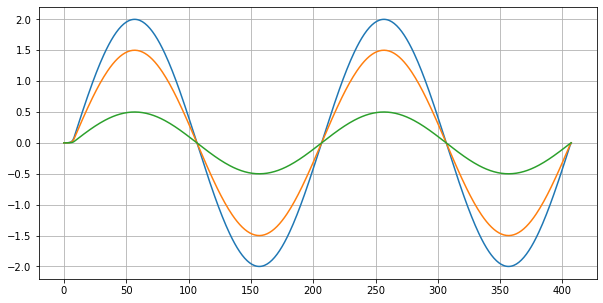

In [6]:
circuit = Circuit("Circuit 3")

circuit.SinusoidalVoltageSource("input", "a", circuit.gnd, amplitude=2@u_V, frequency=50@u_Hz)
circuit.R(1, "a", "b", 1@u_kOhm)
circuit.R(2, "b", "c", 2@u_kOhm)
circuit.R(3, "c", circuit.gnd, 1@u_kOhm)
circuit.R(4, "a", circuit.gnd, 5@u_kOhm)

circuit.R1.plus.add_current_probe(circuit)
circuit.R4.plus.add_current_probe(circuit)

simulator = circuit.simulator(temperature = 25)
analysis = simulator.transient(step_time=100@u_us, end_time=40@u_ms)


figure, ax = plt.subplots(figsize = (10, 5))
ax.grid()
ax.plot(analysis["a"])
ax.plot(analysis["b"])
ax.plot(analysis["c"])



In [7]:
circuit=Circuit("Lab 2.1")

circuit.V(1, "a", circuit.gnd, 50@u_V)
circuit.R(1, "a", "b", 12@u_Ohm)
circuit.R(2, "b", "c", 2@u_Ohm)
circuit.R(3, "a", "c", 10@u_Ohm)
circuit.R(4, "c", circuit.gnd, 5@u_Ohm)
circuit.I(1, circuit.gnd, "b",  3@u_A)

circuit.R4.plus.add_current_probe(circuit)

simulator = circuit.simulator(temperature=25)
analysis = simulator.operating_point()

for node in analysis.nodes.values():
    print('Node {}: {:4.3f} V'.format(str(node), float(node)))
for node in analysis.branches.values():
    print('Branch {}: {:4.6f} A'.format(str(node), float(node)))


Node r4_plus: 30.000 V
Node c: 30.000 V
Node b: 38.000 V
Node a: 50.000 V
Branch v1: -3.000000 A
Branch vr4_plus: 6.000000 A


In [8]:
circuit=Circuit("Lab 2.2")

R1=circuit.R(1, "b", "a", 20@u_Ohm)
R2=circuit.R(2, "c", "a", 3@u_Ohm)
R3=circuit.R(3, "b", "c", 10@u_Ohm)
R4=circuit.R(4, circuit.gnd, "d", 5@u_Ohm)
R5=circuit.R(5, circuit.gnd, "c", 2@u_Ohm)
I1=circuit.I(1, "a", circuit.gnd, 12@u_A)
I2=circuit.I(2, "d", "b", 3@u_A)

simulator = circuit.simulator(temperature=25)
analysis = simulator.operating_point()

print("The voltage across the 20Ω(R1) resistor is: ",float(analysis.nodes["b"])-float(analysis.nodes["a"]))

    

The voltage across the 20Ω(R1) resistor is:  40.0


In [9]:
circuit=Circuit("Lab 2.3")

V1=circuit.V("in1", "a", circuit.gnd, 28@u_V)
V2=circuit.V("in2", "c", circuit.gnd, 32@u_V)

R1=circuit.R(1, "a", "b", 6@u_Ohm)
R2=circuit.R(2, "b", "c", 5@u_Ohm)
R3=circuit.R(3, "b", circuit.gnd, 2@u_Ohm)
R4=circuit.R(4, "a", "c", 8@u_Ohm)
R5=circuit.R(5, "c", "d", 12@u_Ohm)

simulator = circuit.simulator(temperature=25)
analysis = simulator.operating_point()

currentOf28V = float(analysis.branches["vin1"])
currentOf32V = float(analysis.branches["vin2"])

VOf28V =((float(analysis.nodes["a"])-float(analysis.nodes["d"])))
VOf32V = ((float(analysis.nodes["c"])-float(analysis.nodes["d"])))

powerOf28V = currentOf28V*VOf28V
powerOf32V = currentOf32V*VOf32V

print(f'The power of 28V is {powerOf28V}')
print(f'The power of 32V is {powerOf32V}')
for node in analysis.nodes.values():
    print('Node {}: {:4.3f} V'.format(str(node), float(node)))
for node in analysis.branches.values():
    print('Branch {}: {:4.6f} A'.format(str(node), float(node)))
    

The power of 28V is 8.153846153846153
The power of 32V is -0.0
Node d: 32.000 V
Node b: 12.769 V
Node c: 32.000 V
Node a: 28.000 V
Branch vin1: -2.038462 A
Branch vin2: -4.346154 A


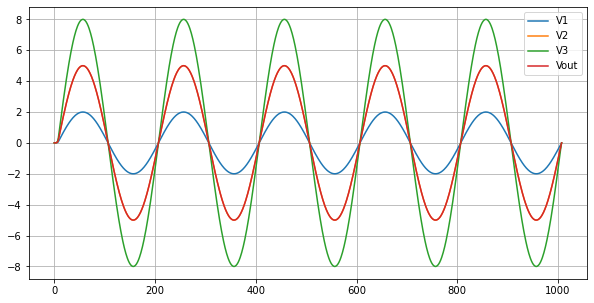

In [10]:
circuit=Circuit("Lab 3.1")

circuit.SinusoidalVoltageSource(1, 1, circuit.gnd, amplitude=2@u_V, frequency=50@u_Hz)
circuit.SinusoidalVoltageSource(2, 2, circuit.gnd, amplitude=5@u_V, frequency=50@u_Hz)
circuit.SinusoidalVoltageSource(3, 3, circuit.gnd, amplitude=8@u_V, frequency=50@u_Hz)

circuit.R(1, 1, "out", 1@u_kOhm)
circuit.R(2, 2, "out", 1@u_kOhm)
circuit.R(3, 3, "out", 1@u_kOhm)


simulator = circuit.simulator(temperature = 25)
analysis = simulator.transient(step_time=100@u_us, end_time=100@u_ms)

figure, ax = plt.subplots(figsize = (10, 5))
ax.grid()
ax.plot(analysis["1"], label="V1")
ax.plot(analysis["2"], label="V2")
ax.plot(analysis["3"], label="V3")
ax.plot(analysis["out"], label="Vout")

plt.legend(loc="upper right")
plt.show()

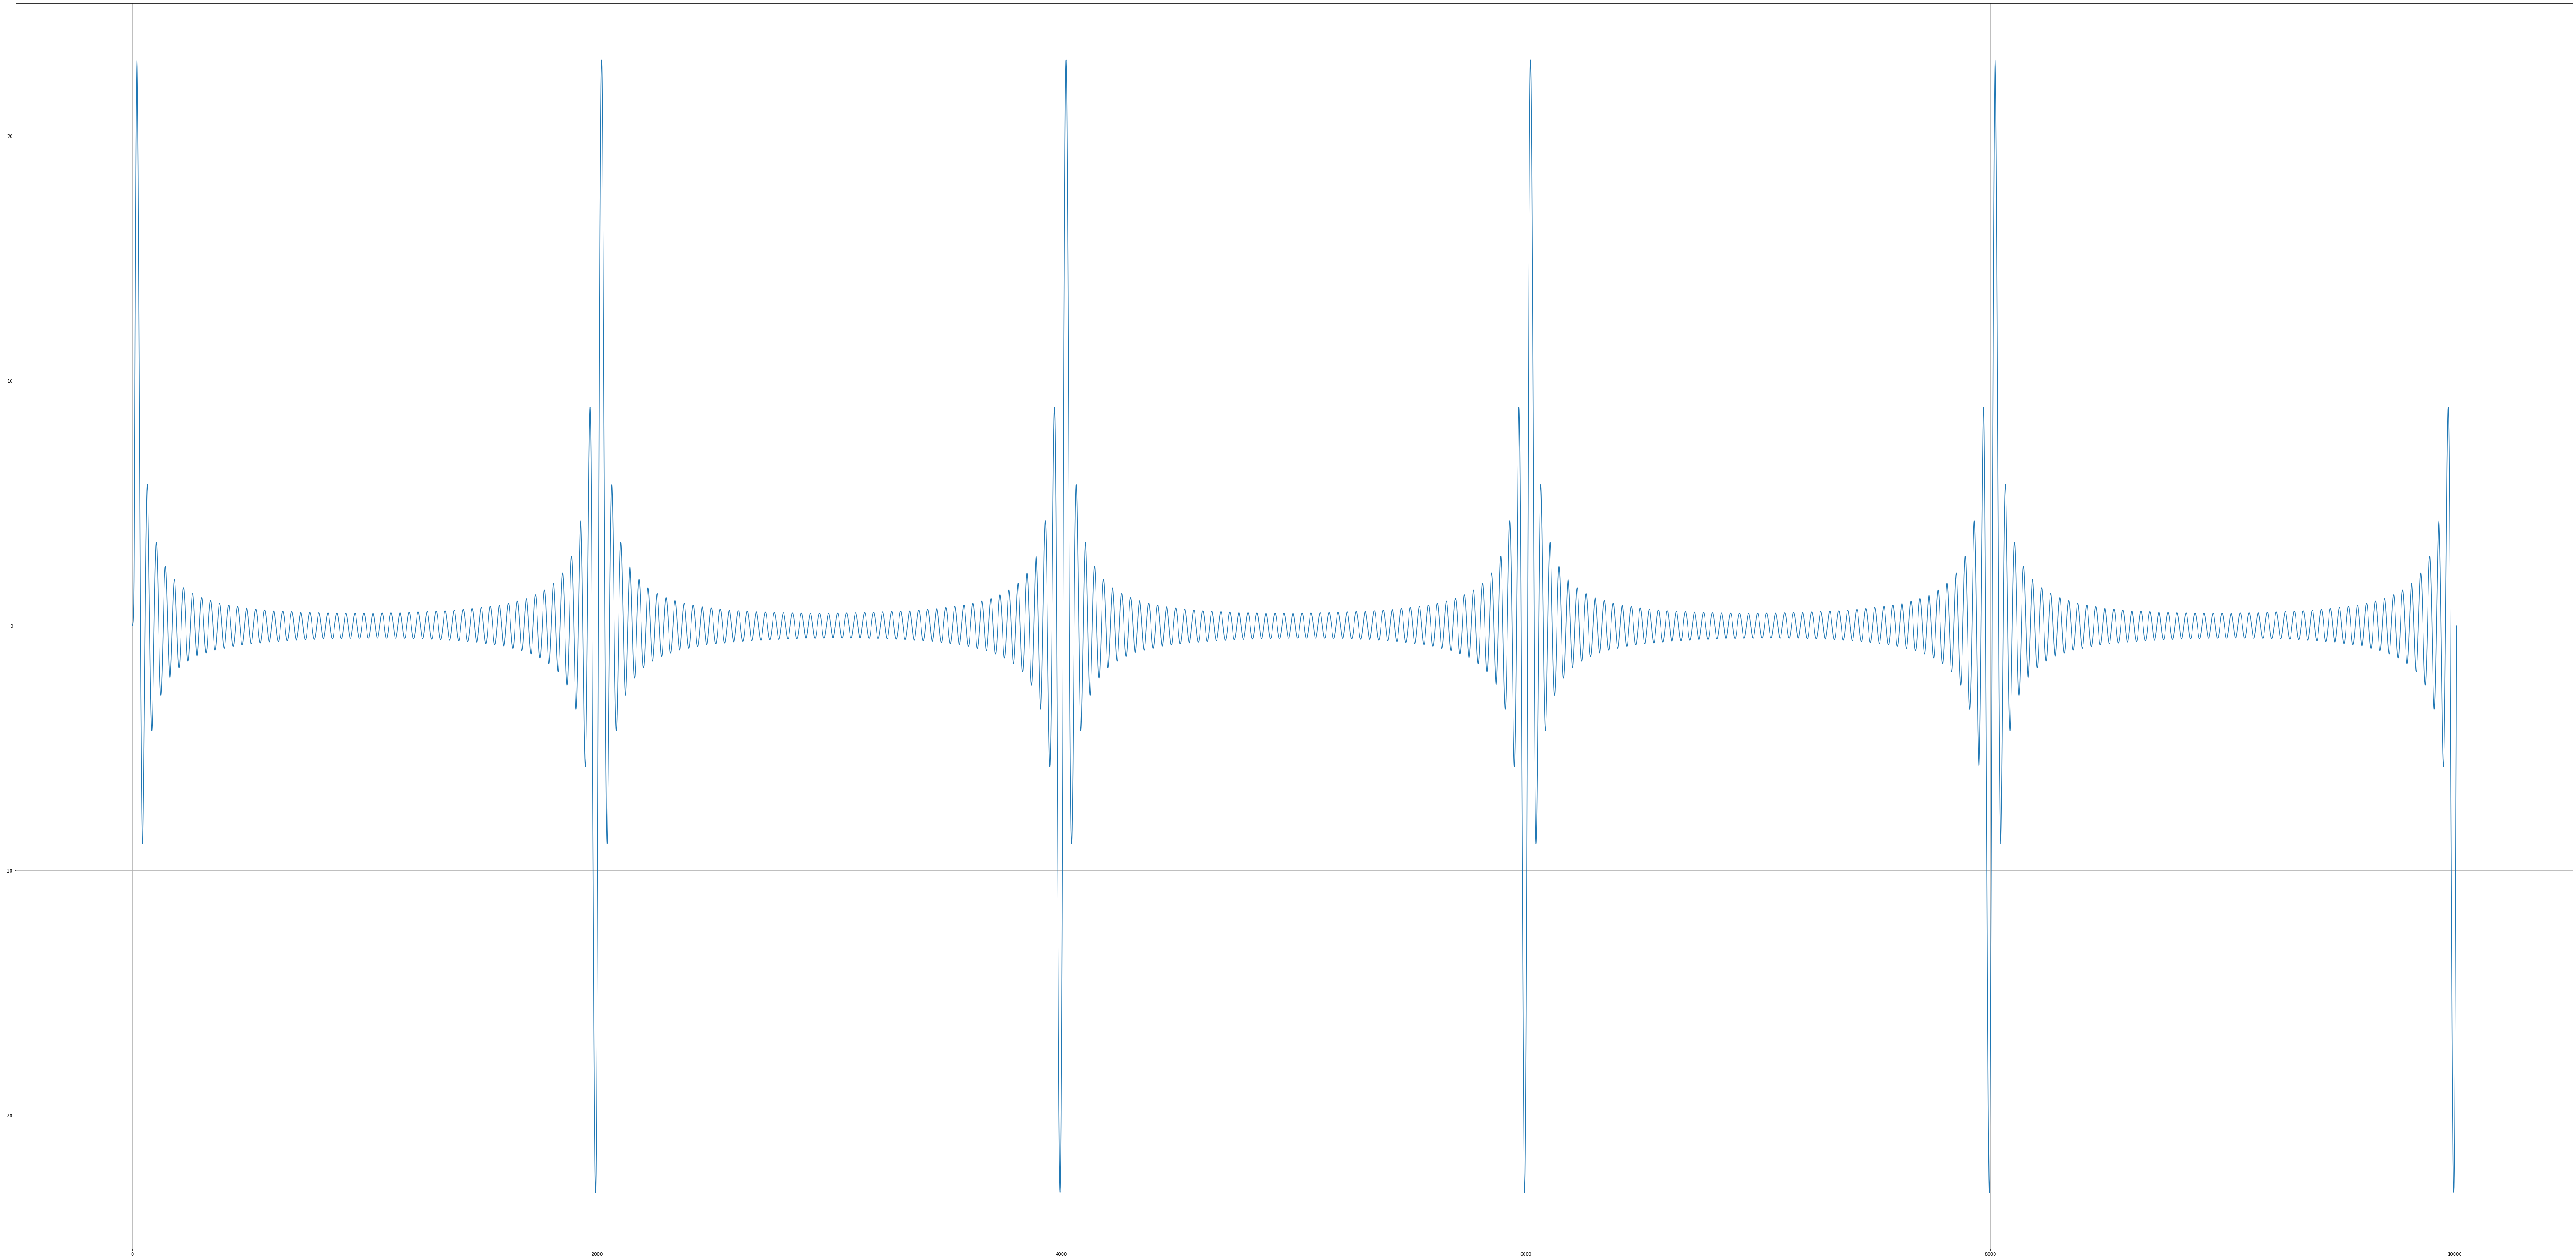

In [11]:
circuit=Circuit("Lab 3.2")

for i in range(50):  
    circuit.SinusoidalVoltageSource(i+1, i+1, circuit.gnd, amplitude=(i+2)@u_V, frequency=50*(i+2)@u_Hz)
    circuit.R(i+1, i+1, "out", 1@u_kOhm)

simulator = circuit.simulator(temperature = 25)
analysis = simulator.transient(step_time=10@u_us, end_time=100@u_ms)

figure, ax = plt.subplots(figsize = (100, 50))
ax.grid()
ax.plot(analysis["out"])


2022-12-27 13:38:04,261 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.ERROR - Warning : voltage source v1 has non-increasing PWL time points.
2022-12-27 13:38:04,263 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.WARNING - Warning: v1: no DC value, transient time 0 value used


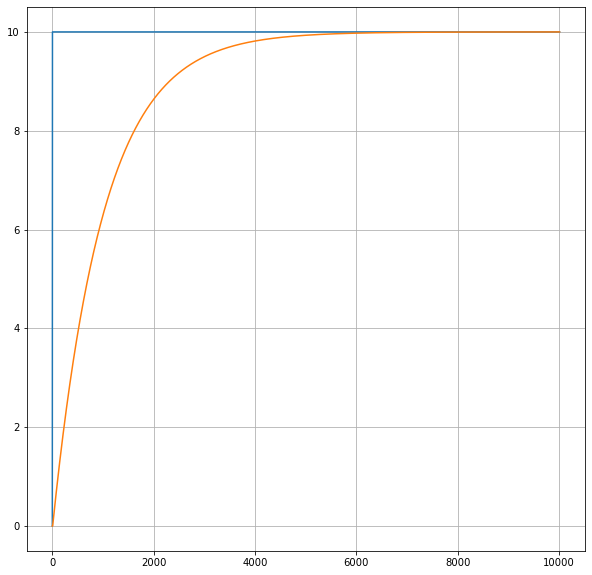

In [12]:
circuit=Circuit("Lab 4.1")

#source = circuit.VoltageSource(1, "a", circuit.gnd, 10@u_V) 
source = circuit.PieceWiseLinearVoltageSource(1, "a", circuit.gnd, values=[(0,0), (0, 10@u_V)])
#source = circuit.PulseVoltageSource(1, "a", circuit.gnd, initial_value=0@u_V, pulsed_value= 10@u_V, pulse_width= 100@u_ms, period = 200@u_ms)
R1=circuit.R(1, "a", "b", 100@u_kOhm)
C1=circuit.C(1, "b", circuit.gnd, 0.1@u_nF)

simulator = circuit.simulator(temperature=25)
analysis = simulator.transient(step_time=0.01@u_us, end_time=100@u_us)

figure, ax = plt.subplots(figsize = (10, 10))
ax.grid()
ax.plot(analysis["a"])
ax.plot(analysis["b"])

2022-12-27 13:38:04,545 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword
2022-12-27 13:38:04,550 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.ERROR - Warning : voltage source vinput has non-increasing PWL time points.
2022-12-27 13:38:04,551 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.WARNING - Warning: vinput: no DC value, transient time 0 value used


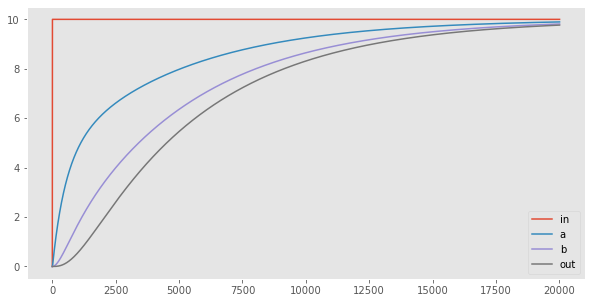

In [13]:
plt.style.use("ggplot")

circuit = Circuit("LAB_5")

def func(x, a, b, c):
    return a * np.exp(-b*x) + c

V = circuit.PieceWiseLinearVoltageSource('input', 'in', circuit.gnd, values=[(0,0),(0,10@u_V)])
R1 = circuit.R(1, "in", "a", 100@u_kOhm)
R2 = circuit.R(2, "a", "b", 100@u_kOhm)
R3 = circuit.R(3, "b", "out", 100@u_kOhm)

C1 = circuit.C(1, "a", circuit.gnd, 0.1@u_uF)
C2 = circuit.C(2, "b", circuit.gnd, 0.1@u_uF)
C3 = circuit.C(3, "out", circuit.gnd, 0.1@u_uF)

simulator = circuit.simulator(temperature=25)
analysis = simulator.transient(step_time=10@u_us, end_time=200@u_ms)

figure, ax = plt.subplots(figsize=[10,5])
ax.grid()
ax.plot(analysis["in"], label="in")
ax.plot(analysis["a"], label="a")
ax.plot(analysis["b"], label="b")
ax.plot(analysis["out"], label="out")
ax.legend()

tau=RC= 0.2
Vc(5tau) (Percentage) = 99.32839385
Vc(5tau) Theoretical = 99.32620530009146


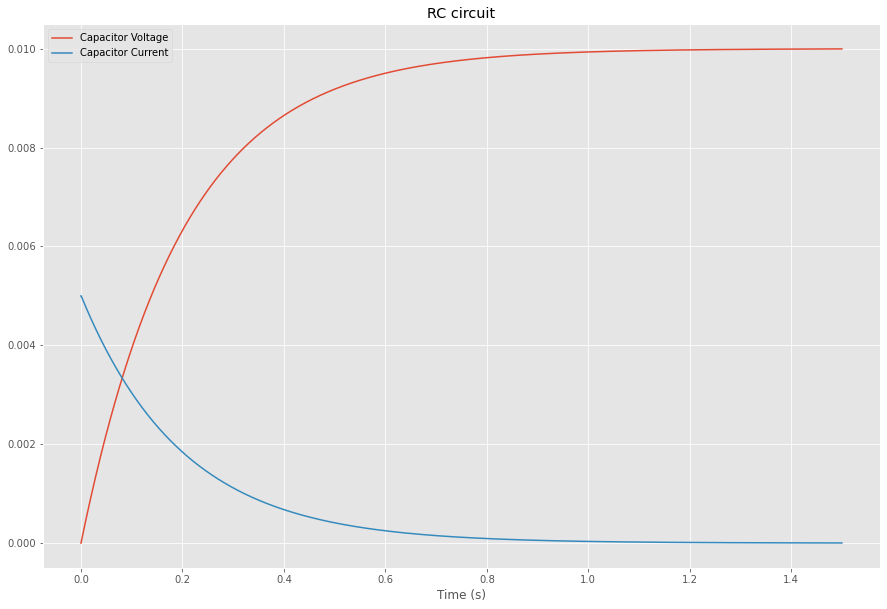

In [14]:
#dersteki

plt.style.use('ggplot')
plt.figure(figsize=(15,10))

N=5000	#number of steps
T=1.5	#simulation time in seconds

c = 100 * 10**(-3)
v = 5
i = 5 * 10 ** (-3)
r = 2

t = np.empty(N)
Vc = np.empty(N)
Ic = np.empty(N)

dt=T/N

#initial values
Vc[0]=0
Ic[0]=i

for k in range(0,N-1):
	Vc[k+1]=Vc[k]-dt*Vc[k]/(r*c)+i*dt/c
	Ic[k+1]=c*(Vc[k+1]-Vc[k])/dt
	t[k+1]=t[k]+dt
	
plt.plot(t,Vc,label='Capacitor Voltage')
plt.plot(t,Ic,label='Capacitor Current')

print("tau=RC=",round(r*c,6))
print("Vc(5tau) (Percentage) =",round(Vc[int(5*r*c/T*N)],12)/(i*r)*100)
print("Vc(5tau) Theoretical =",(1-np.exp(-5))*100)

plt.xlabel('Time (s)')
plt.title('RC circuit')
plt.legend()
plt.show()

Time constant is 2.5e-09
Vr when t = 0.1s is 0.0025


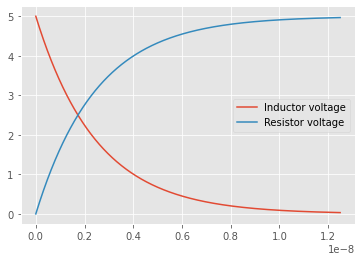

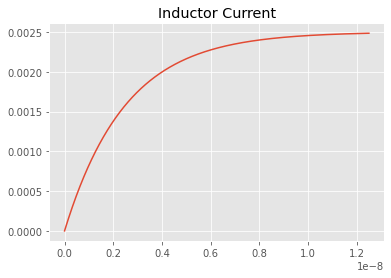

In [15]:
#LAB_6
plt.style.use('ggplot')

v1 = 5
r = 2 * 10 ** 3
l = 5 * 10 ** (-6)
tau = l/r

N = 1500
T = 5 * tau

t = np.empty(N)
Vl = np.empty(N)
Vr = np.empty(N)
Il = np.empty(N)

dt = T / N

Vl[0] = v1
Vr[0] = 0
Il[0] = 0

for i in range(0, N-1):
    Il[i+1] = v1/l * dt - Il[i] * r/l * dt + Il[i]
    Vl[i+1] = v1 - ((v/l - Il[i]* r/l) * r * dt + Il[i] * r)
    Vr[i+1] = ((v1/l - Il[i]* r/l) * r * dt + Il[i] * r)
    t[i+1] = t[i] + dt

plt.figure()
plt.plot(t, Vl, label="Inductor voltage")
plt.plot(t, Vr, label="Resistor voltage")
plt.legend()

plt.figure()
plt.title("Inductor Current")
plt.plot(t, Il)

print("Time constant is", round(tau, 10))
print("Vr when t = 0.1s is", v/r * (1-np.exp(-0.1/tau)))

2022-12-27 13:38:05,821 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword


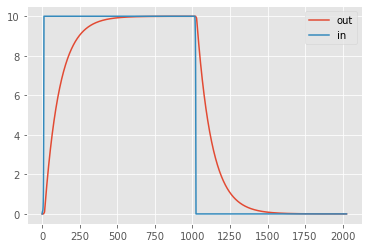

In [16]:
circuit = Circuit("Lab7")


source = circuit.PulseVoltageSource("input", "in", circuit.gnd,
                                    initial_value=0@u_V, pulsed_value=10@u_V,
                                    pulse_width=100@u_ms, period=200@u_ms)

R = circuit.R(1, "in", "a", 100@u_kOhm)
L = circuit.L(1, "a", "out", 10@u_mH)
C = circuit.C(1, "out", circuit.gnd, 0.1@u_uF)

simulator = circuit.simulator(temperature=25)
analysis = simulator.transient(step_time=100@u_us, end_time=200@u_ms)

plt.plot(analysis["out"], label="out")
plt.plot(analysis["in"], label="in")
plt.legend(loc="upper right")

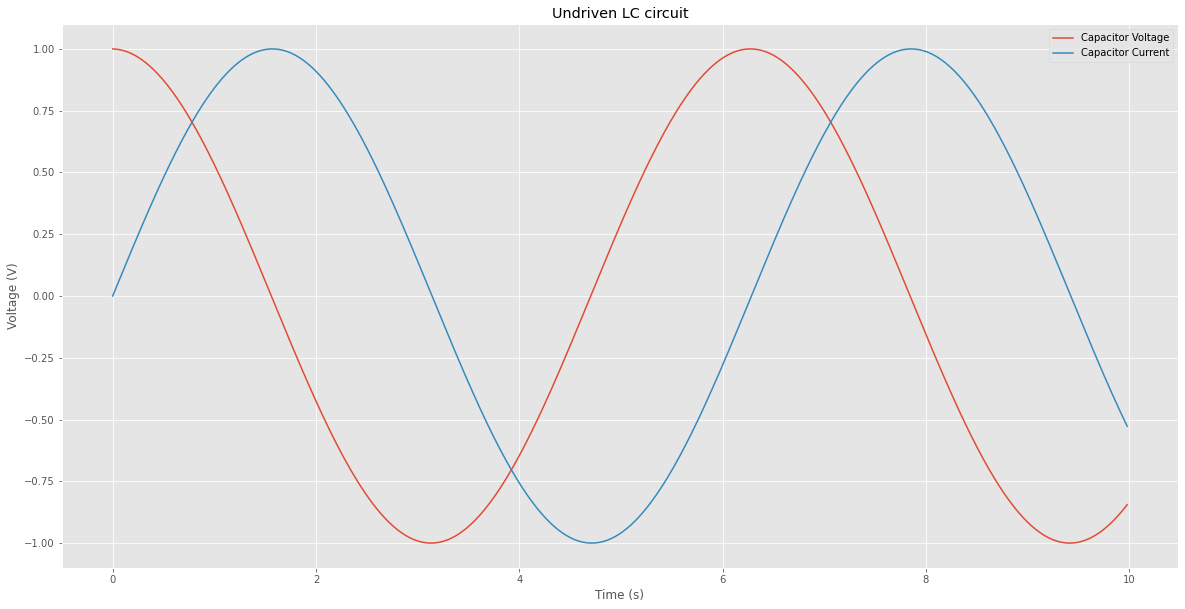

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))

N=500  #number of steps
T=10   #simulation time in seconds

c = 1
l = 1

t = np.empty(N)
V = np.empty(N)
I = np.empty(N)

dt=T/N

#initial values
V[0]=1
I[0]=0

for k in range(0,N-1):
	I[k+1]=I[k]+(1/l)*V[k]*dt	
	V[k+1]=V[k]-(1/c)*I[k+1]*dt
	t[k+1]=t[k]+dt
	

plt.plot(t,V,label='Capacitor Voltage')
plt.plot(t,I,label='Capacitor Current')


plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Undriven LC circuit')
plt.legend()
plt.show()

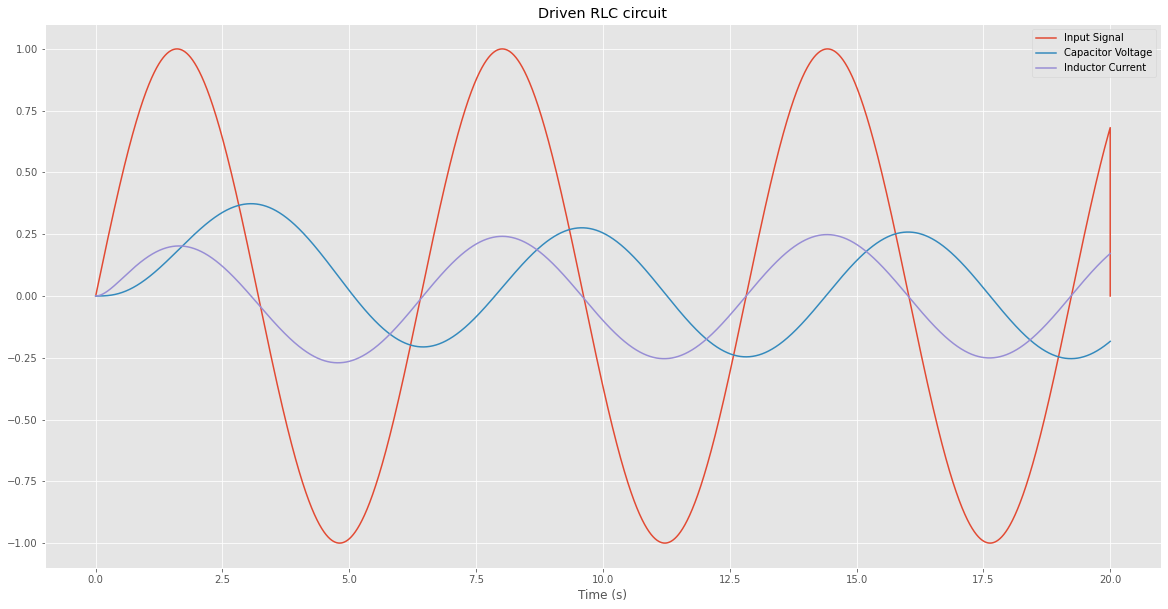

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))

N=50000  #number of steps
T=20     #simulation time in seconds

c = 1
l = 1
r = 4

t = np.empty(N)
Vi = np.empty(N)
I = np.empty(N)
V = np.empty(N)

dt=T/N

#initial values
V[0]=0
I[0]=0

for k in range(0,N-1):
	
	#Vi[k]=1; # Step input
	#Vi[k]=t[k]; # Ramp input
	Vi[k]=np.sin(0.98*t[k])

	I[k+1]=I[k]-(1/l)*V[k]*dt-r/l*I[k]*dt+Vi[k]/l*dt	
	V[k+1]=V[k]+I[k+1]/c*dt
	t[k+1]=t[k]+dt	

plt.plot(t,Vi,label='Input Signal')
plt.plot(t,V,label='Capacitor Voltage')
plt.plot(t,I,label='Inductor Current')


plt.xlabel('Time (s)')
plt.title('Driven RLC circuit')
plt.legend()
plt.show()

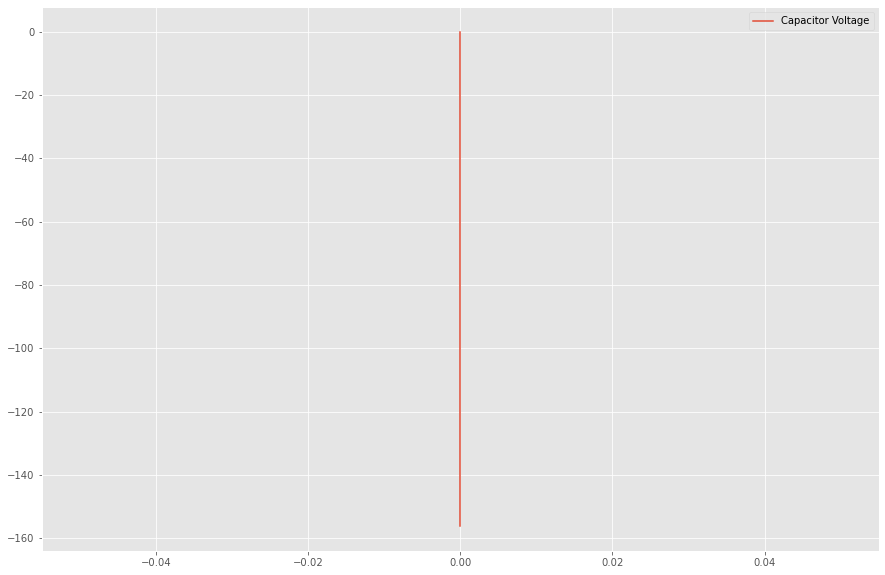

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

N=1000	#number of steps
T=2	    #simulation time in seconds

c1 = 1
c2 = 1
v = 0.8
va=Vc
id = round(10**(-12)*(np.exp(v/0.025)-1),10)
r = 1
i1=(v-va)/r
ic=i1-id

t = np.empty(N)
Vc = np.empty(N)
Ic = np.empty(N)
dt=T/N

Vc[0]=0
Ic[0]=i

for k in range(0, N-1):
    Vc[k+1] = Vc[k]+(v-id)*dt
    

plt.plot(t,Vc,label='Capacitor Voltage')
plt.legend()
plt.show()


<ipython-input-20-c4503ad16875>:27: RuntimeWarning: overflow encountered in exp
  v2[j+1]=v2[j]+Is/c2*(np.exp((v1[j]-v2[j])/0.025)-1)*dt
<ipython-input-20-c4503ad16875>:28: RuntimeWarning: overflow encountered in exp
  v1[j+1]=v1[j]+Is/c1*(1-np.exp((v1[j]-v2[j])/0.025))*dt+(vi[j]-v1[j])/(r*c1)*dt
<ipython-input-20-c4503ad16875>:28: RuntimeWarning: invalid value encountered in double_scalars
  v1[j+1]=v1[j]+Is/c1*(1-np.exp((v1[j]-v2[j])/0.025))*dt+(vi[j]-v1[j])/(r*c1)*dt


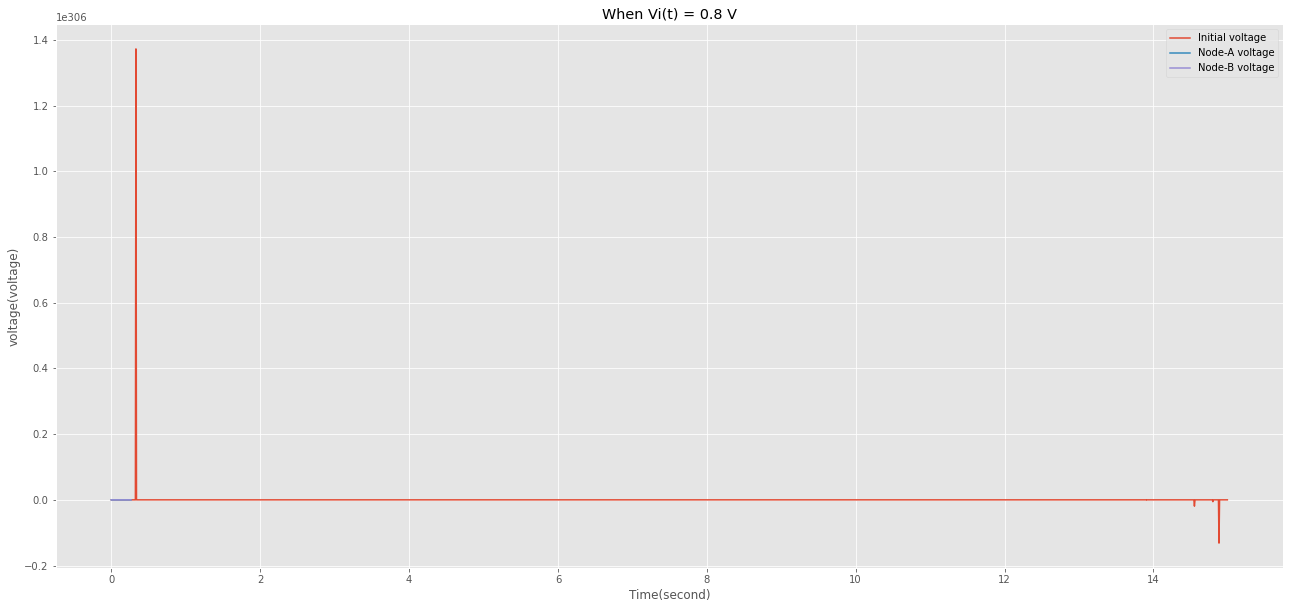

In [20]:
#280201031 Onur Şahinler
plt.style.use('ggplot')
plt.figure(figsize=(22,10))

N=2000 #number of steps
T=15   # imulation time in seconds
dt=T/N

c1=1
c2=1
r=1

t = np.empty(N)
vi = np.empty(N)
v1 = np.empty(N)
v2 = np.empty(N)

#initial values
v1[0]=v2[0]=0
t[0]=0
vi[0]=0
Is=10**(-12)

for j in range(0,N-1):
	#vi[j+1]=0.8
	Vi[k+1]=5*np.sin(t[j])
	v2[j+1]=v2[j]+Is/c2*(np.exp((v1[j]-v2[j])/0.025)-1)*dt
	v1[j+1]=v1[j]+Is/c1*(1-np.exp((v1[j]-v2[j])/0.025))*dt+(vi[j]-v1[j])/(r*c1)*dt
	t[j+1]=t[j]+dt


plt.plot(t,vi,label='Initial voltage')
plt.plot(t,v1,label='Node-A voltage')
plt.plot(t,v2,label='Node-B voltage')


plt.xlabel('Time(second)')
plt.ylabel('voltage(voltage)')
plt.title("When Vi(t) = 0.8 V")
plt.legend()
plt.show()

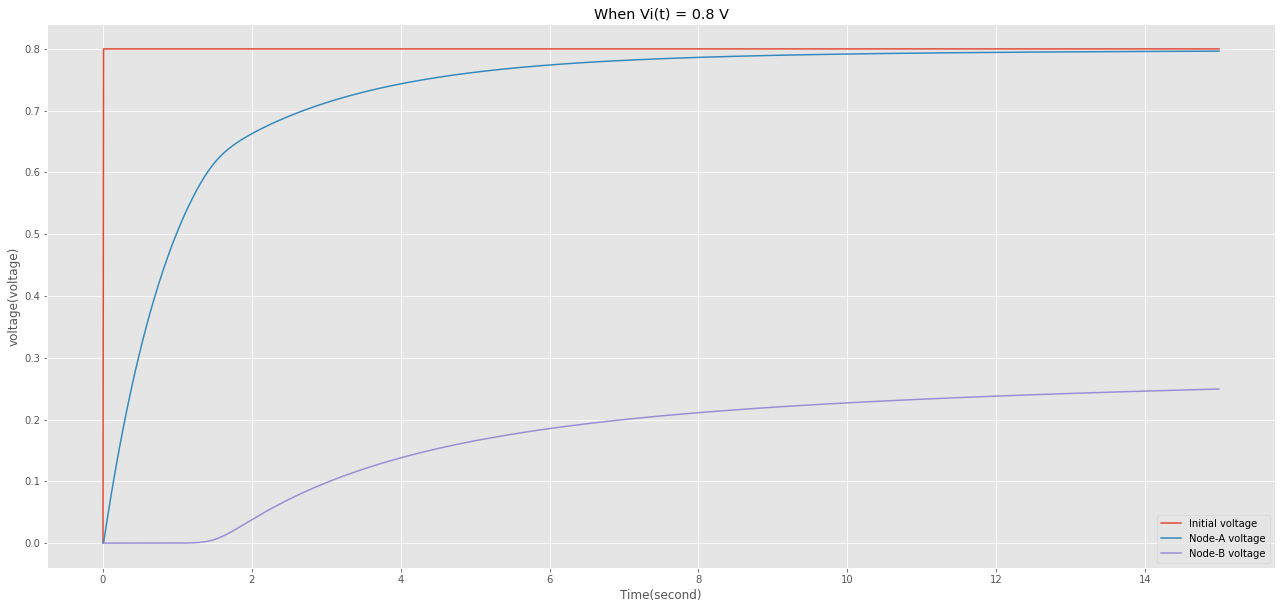

In [21]:
#280201031 Onur Şahinler
plt.style.use('ggplot')
plt.figure(figsize=(22,10))

N=2000 #number of steps
T=15   #imulation time in seconds
dt=T/N

c1=1
c2=1
r=1

t = np.empty(N)
vi = np.empty(N)
v1 = np.empty(N)
v2 = np.empty(N)

#initial values
v1[0]=v2[0]=0
t[0]=0
vi[0]=0
Is=10**(-12)

for j in range(0,N-1):
	vi[j+1]=0.8
	#Vi[j+1]=5*np.sin(t[j]) for second question
	v2[j+1]=v2[j]+Is/c2*(np.exp((v1[j]-v2[j])/0.025)-1)*dt
	v1[j+1]=v1[j]+Is/c1*(1-np.exp((v1[j]-v2[j])/0.025))*dt+(vi[j]-v1[j])/(r*c1)*dt
	t[j+1]=t[j]+dt


plt.plot(t,vi,label='Initial voltage')
plt.plot(t,v1,label='Node-A voltage')
plt.plot(t,v2,label='Node-B voltage')


plt.xlabel('Time(second)')
plt.ylabel('voltage(voltage)')
plt.title("When Vi(t) = 0.8 V")
plt.legend()
plt.show()

In [22]:
circuit = Circuit('NOT Gate')
circuit.model('mynmos','NMOS', level=1)
circuit.model('mypmos','PMOS', level=1)
HIGH = 3.3@u_V
LOW = 0@u_V
circuit.V(1,'Vdd',circuit.gnd, HIGH)
circuit.V(2,'in',circuit.gnd, LOW)
circuit.MOSFET(1, 'out', 'in', 'Vdd', 'Vdd', model='mypmos')
circuit.MOSFET(2, 'out', 'in', circuit.gnd, circuit.gnd, model='mynmos')
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()
print("=== NETLIST ===")
print(circuit)
print("=== ANALYSIS RESULTS ===")
for node in analysis.nodes.values():
 print('Node {}: {:4.3f} V'.format(str(node), float(node)))
for node in analysis.branches.values():
 print('Branch {}: {:4.6f} A'.format(str(node), float(node))) 

2022-12-27 13:38:08,185 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword
=== NETLIST ===
.title NOT Gate
V1 Vdd 0 3.3V
V2 in 0 0V
M1 out in Vdd Vdd mypmos
M2 out in 0 0 mynmos
.model mynmos NMOS (level=1)
.model mypmos PMOS (level=1)

=== ANALYSIS RESULTS ===
Node out: 3.300 V
Node in: 0.000 V
Node vdd: 3.300 V
Branch v1: -0.000000 A
Branch v2: 0.000000 A


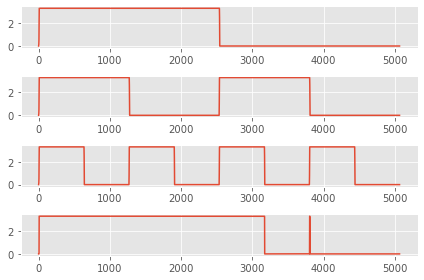

In [23]:
# IMPLEMENTING A LOGIC FUNCTION WITH MOSFETS
circuit = Circuit('COMBINATIONAL LOGIC CIRCUIT')
#circuit.include(spice_library['ptm65nm_nmos'])
circuit.model('mynmos','NMOS', level=1)
circuit.model('mypmos','PMOS', level=1)
 
# Define the DC supply voltage value
HIGH = 3.3@u_V
LOW = 0@u_V
 
circuit.V(1,'Vdd',circuit.gnd, HIGH)
 
a = circuit.PulseVoltageSource('in1', 'a', circuit.gnd,
 initial_value=0@u_V, pulsed_value=3.3@u_V,
 pulse_width=100@u_ms, period=200@u_ms, )
b = circuit.PulseVoltageSource('in2', 'b', circuit.gnd, 
 initial_value=0@u_V, pulsed_value=3.3@u_V,
 pulse_width=50@u_ms, period=100@u_ms,delay_time=0@u_ms)
c = circuit.PulseVoltageSource('in3', 'c', circuit.gnd, 
 initial_value=0@u_V, pulsed_value=3.3@u_V,
 pulse_width=25@u_ms, period=50@u_ms,delay_time=0@u_ms)


 
circuit.MOSFET(1, 'd1', 'c', circuit.gnd, circuit.gnd, model='mynmos')
circuit.MOSFET(2, 'd3', 'a', circuit.gnd, circuit.gnd, model='mynmos')
circuit.MOSFET(3, 'd3', 'b', 'd1', 'd1', model='mynmos')

circuit.MOSFET(4, 's6', 'b', 'Vdd', 'Vdd', model='mypmos')
circuit.MOSFET(5, 's6', 'c', 'Vdd', 'Vdd', model='mypmos')
circuit.MOSFET(6, 'd3', 'a', 's6', 's6', model='mypmos')
 
circuit.MOSFET(7, 'f', 'd3', circuit.gnd, circuit.gnd, model='mynmos')
circuit.MOSFET(8, 'f', 'd3', 'Vdd', 'Vdd', model='mypmos')
 
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=a.period/5000, end_time=a.period*1)
 
figure, ((ax1, ax2, ax3,ax4)) = plt.subplots(4, 1, figsize=(6, 4))
 
#figure, ax = plt.subplots(figsize=(20, 10))
#ax1.grid()
 
ax.set_title('Logic Gate')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
 
ax1.plot(analysis['a'])
ax2.plot(analysis['b'])
ax3.plot(analysis['c'])
ax4.plot(analysis['f'])
 
#ax.legend(('in1','in2', 'out'), loc=(.05,.1))
#ax.set_ylim(-1,4)
plt.tight_layout()
plt.show()